In [73]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from orphics import sehgal
import healpy as hp
import itertools
from cosmikyu import utils
from itertools import cycle
import matplotlib.ticker as mtick
import matplotlib.ticker as mticker

sns.set("paper")
sns.set_style("whitegrid")
sns.color_palette("colorblind")

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
data_dir = "/home/dwhan89/workspace/cosmikyu/data/sehgal"
def data_path(x):
    return os.path.join(data_dir, x)

plot_dir = "/home/dwhan89/scratch/outbox/cosmikyu"
def plot_path(x):
    return os.path.join(plot_dir, x)

nbins = 10000
#hists_test = utils.load_data(data_path("original_histogram_fullv3.npz"))
hists_test = utils.load_data(data_path("141020_normalized_histogram_test_{}.npz".format(nbins)))
hists_test_raw = utils.load_data(data_path("141020_raw_histogram_test_{}.npz".format(nbins)))
hists_generated = utils.load_data(data_path("151020_normalized_histogram_generated_{}.npz".format(nbins)))
#norm_info = utils.load_data(data_path("normalization_info_fullv3.npz"))


In [75]:
def key2label(key):
    storage = {"kappa":r"$\kappa$",
               "ksz":"kSZ",
               "tsz":"tSZ",
               "ir_pts":"CIB",
               "rad_pts":"Radio",
              }
    return storage[key]

    
class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = 'E{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)

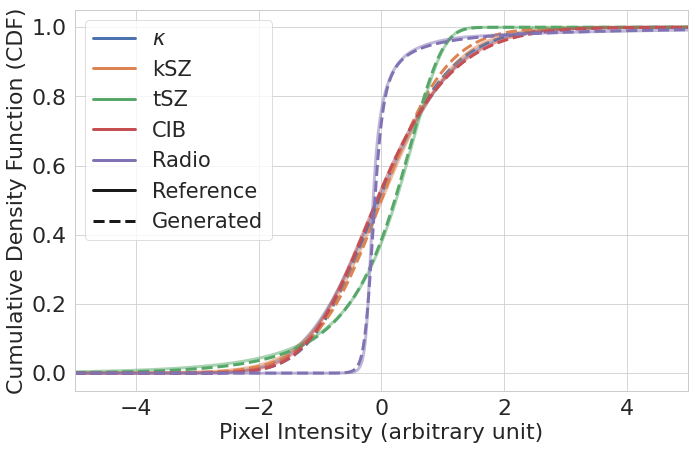

In [78]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])

fig = plt.figure(figsize=(11, 7))
ax = fig.gca()
save_point = 10
for key in hists_test.keys():
    color = next(colors)
    hist = hists_test[key]['hist']
    bins = hists_test[key]["bin_centers"]
    nsum = np.sum(hist)
    hist = hist/nsum
    x = bins
    cdf = np.zeros(len(x))
    for i, lmin in enumerate(x):
        loc = np.where(bins<lmin)
        cdf[i] = np.sum(hist[loc])    
    plt.plot(x, cdf, alpha=0.5, lw=3, ls="-", color=color)
    
    hist = hists_generated["{}_{}".format(key,save_point)]['hist']
    bins = hists_generated["{}_{}".format(key,save_point)]["bin_centers"]
    nsum = np.sum(hist)
    hist = hist/nsum
    
    for i, lmin in enumerate(x):
        loc = np.where(bins<lmin)
        cdf[i] = np.sum(hist[loc])    
    plt.plot(x, cdf, alpha=1, lw=3, ls="--", color=color)
    
    plt.plot([],[], lw=3, label=key2label(key))
plt.plot([], [], lw=3, label="Reference", color="k")
plt.plot([], [], ls='--', lw=3, label="Generated", color="k")
    
#plt.title("Pixel Intensity after Normalization", fontsize=20)

plt.xlabel("Pixel Intensity (arbitrary unit)", fontsize=22)
plt.ylabel("Cumulative Density Function (CDF)", fontsize=22)
plt.xlim(-5,5)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='both', which='minor', labelsize=22)
plt.legend(fontsize=21)
plt.ylim(-0.05,1.05)
#plt.axvline(x=1, ls="--", lw=2, color="k")
#plt.axvline(x=-1, ls="--", lw=2, color="k")
plt.yscale("linear")
plt.savefig(plot_path("090920_normalized_cdf.pdf"), bbox_inches='tight')
plt.show()

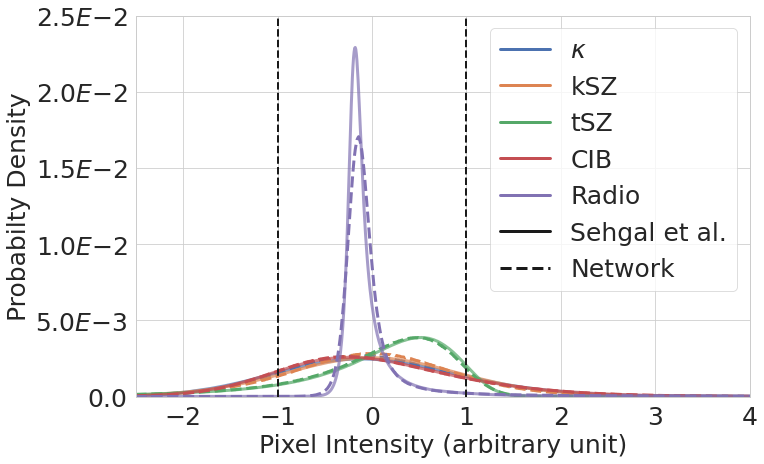

In [82]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])

fig = plt.figure(figsize=(11, 7))
ax = fig.gca()
save_point = 10
for key in hists_test.keys():
    color = next(colors)
    hist = hists_test[key]['hist']
    bins = hists_test[key]["bin_centers"]
    nsum = np.sum(hist)
    hist = hist/nsum
    x = bins
    plt.plot(x, hist, alpha=0.7, lw=3, ls="-", color=color)
    
    hist = hists_generated["{}_{}".format(key,save_point)]['hist']
    bins = hists_generated["{}_{}".format(key,save_point)]["bin_centers"]
    nsum = np.sum(hist)
    hist = hist/nsum
 
    plt.plot(x, hist, alpha=1, lw=3, ls="--", color=color)
    
    plt.plot([],[], lw=3, label=key2label(key))
plt.plot([], [], lw=3, label="Sehgal et al.", color="k")
plt.plot([], [], ls='--', lw=3, label="Network", color="k")
    
#plt.title("Pixel Intensity after Normalization", fontsize=20)

plt.xlabel("Pixel Intensity (arbitrary unit)", fontsize=25)
plt.ylabel("Probabilty Density", fontsize=25)
plt.xlim(-4,4)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
plt.legend(fontsize=25)
plt.axvline(x=1, ls="--", lw=2, color="k")
plt.axvline(x=-1, ls="--", lw=2, color="k")
plt.yscale("linear")
plt.ylim(0,2.5E-2)
plt.xlim(-2.5,4)
ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.1e"))
plt.savefig(plot_path("152020_generated_pdf.pdf"), bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

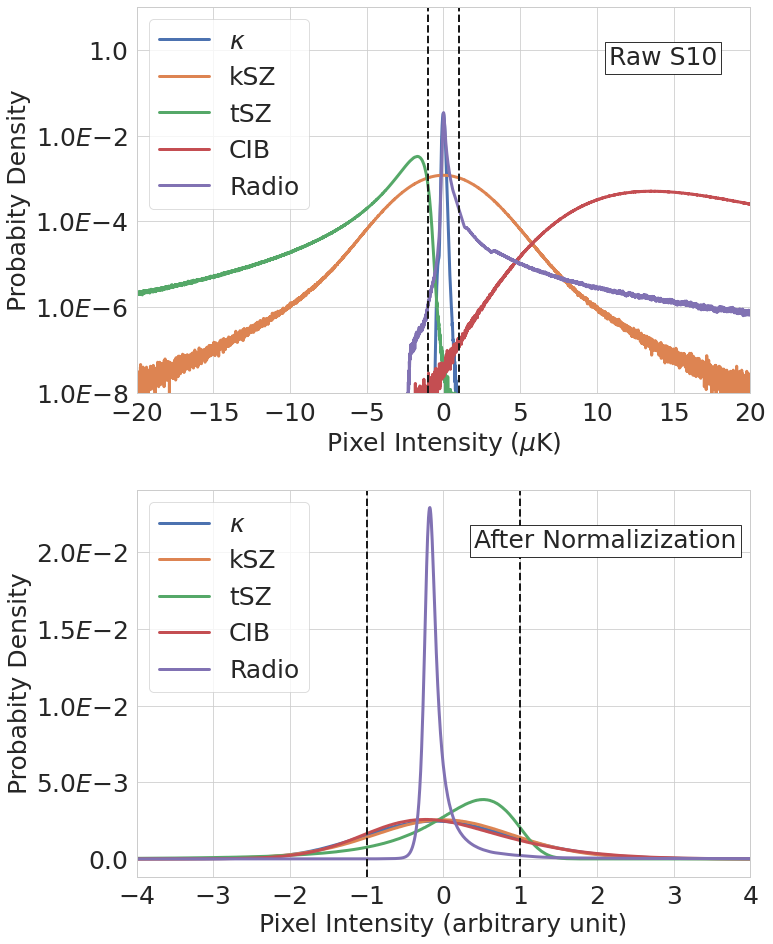

In [52]:
plt.clf()
fig, axes = plt.subplots(2, figsize=(11, 16))
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
save_point = 10
for key in hists_test.keys():
    color = next(colors)
    hist = hists_test_raw[key]['hist']
    bins = hists_test_raw[key]["bin_centers"]
    nsum = np.sum(hist)
    hist = hist/nsum
    x = bins    
    axes[0].plot(x, hist, alpha=1, lw=3, ls="-", color=color)
    axes[0].plot([],[], lw=3, label=key2label(key))
    
axes[0].set_xlabel(r"Pixel Intensity ($\mu$K)", fontsize=25)
axes[0].set_ylabel("Probabity Density", fontsize=25)
axes[0].text(0.77, 0.85, 'Raw S10', transform=axes[0].transAxes, fontsize=25,
         bbox=dict(facecolor='white', alpha=1, edgecolor='black'))
axes[0].set_xlim(-20,20)
axes[0].set_ylim(1e-8,10)
axes[0].set_yscale("log")
axes[0].legend(fontsize=25, loc="upper left")

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
for key in hists_test.keys():
    color = next(colors)
    hist = hists_test[key]['hist']
    bins = hists_test[key]["bin_centers"]
    nsum = np.sum(hist)
    hist = hist/nsum
    x = bins    
    axes[1].plot(x, hist, alpha=1, lw=3, ls="-", color=color)
    axes[1].plot([],[], lw=3, label=key2label(key))
    
axes[1].set_xlabel("Pixel Intensity (arbitrary unit)", fontsize=25)
axes[1].set_ylabel("Probabity Density", fontsize=25)
axes[1].text(0.55, 0.85, 'After Normalizization', transform=axes[1].transAxes, fontsize=25,
         bbox=dict(facecolor='white', alpha=1, edgecolor='black'))
axes[1].set_xlim(-4,4)
axes[1].legend(fontsize=25, loc="upper left")

for i in range(2):
    axes[i].tick_params(axis='both', which='major', labelsize=25)
    axes[i].tick_params(axis='both', which='minor', labelsize=25)
    axes[i].axvline(x=1, ls="--", lw=2, color="k")
    axes[i].axvline(x=-1, ls="--", lw=2, color="k")
    axes[i].yaxis.set_major_formatter(MathTextSciFormatter("%1.1e"))
plt.subplots_adjust(wspace=0, hspace=0.25)
plt.savefig(plot_path("141020_pdfs_norm.pdf"), bbox_inches='tight')
plt.show()

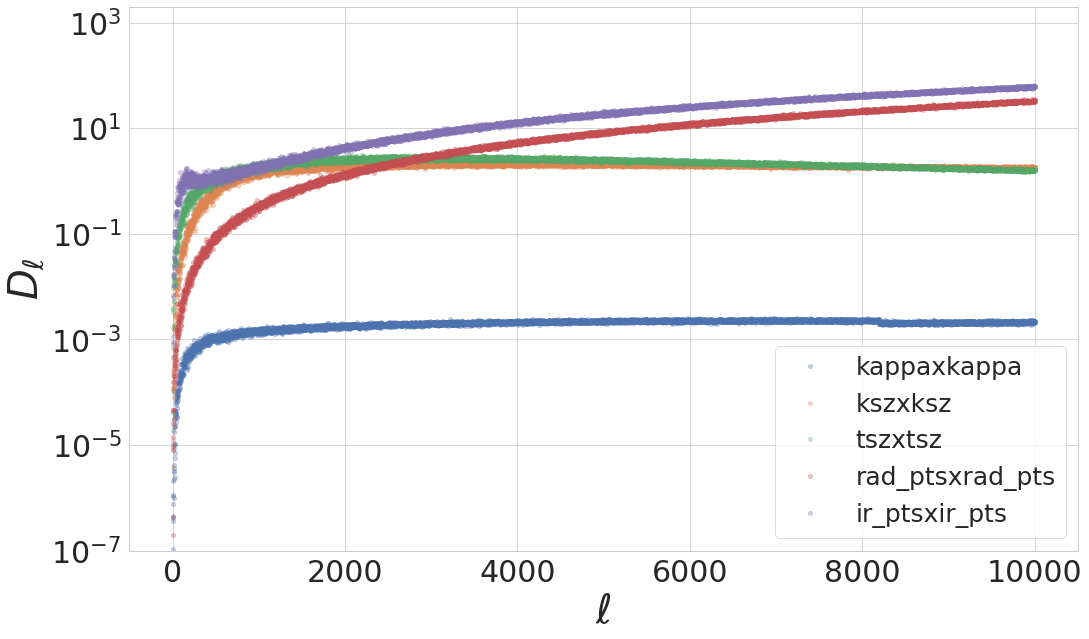

/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


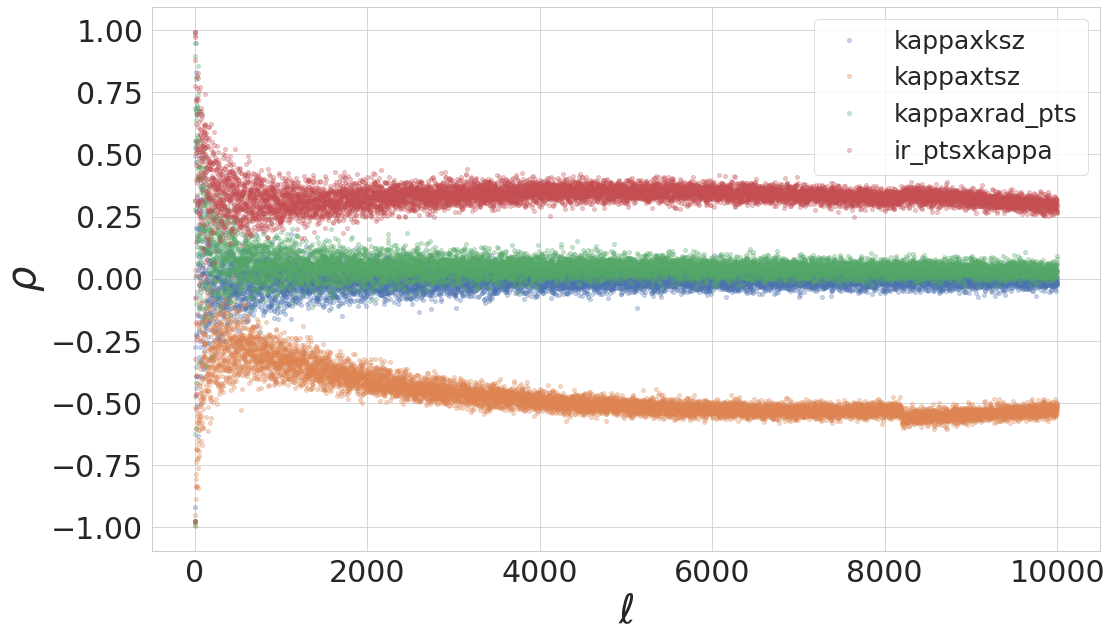

/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


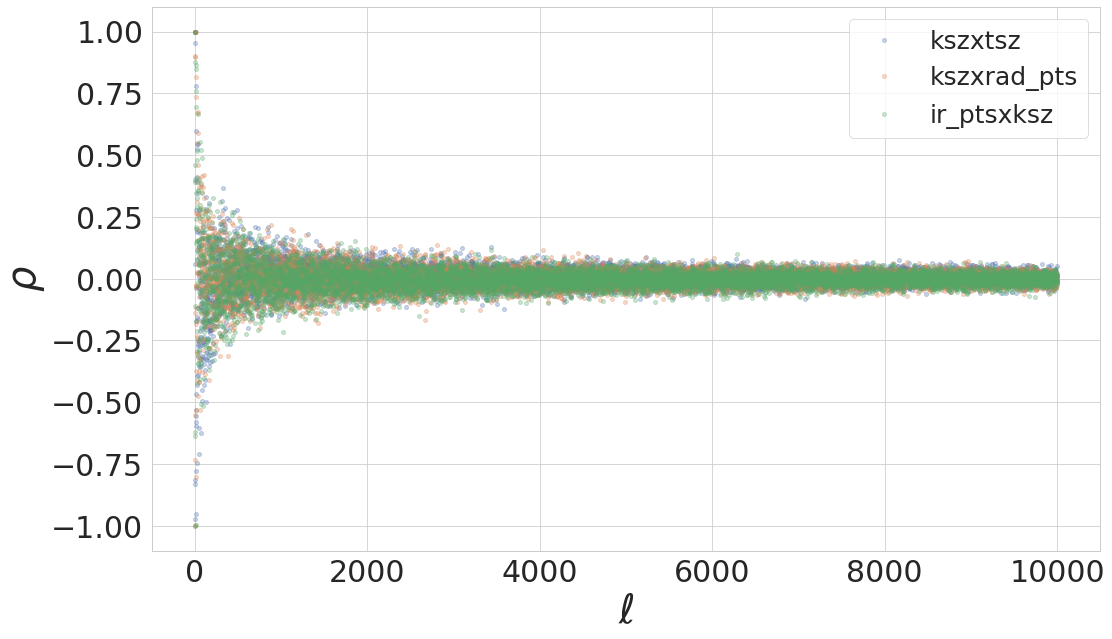

/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


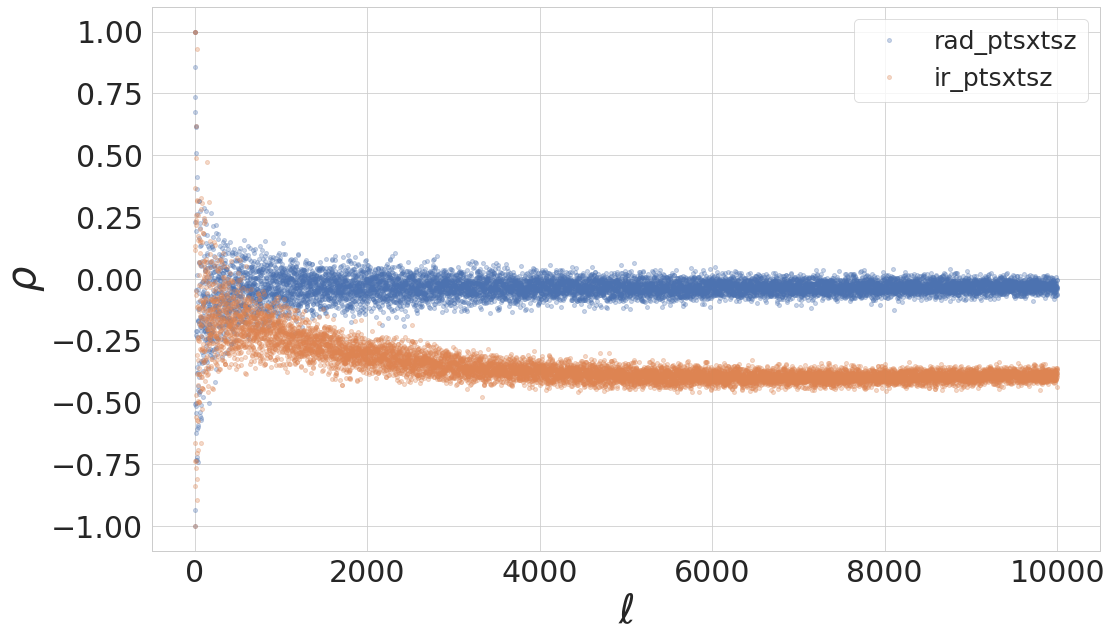

/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


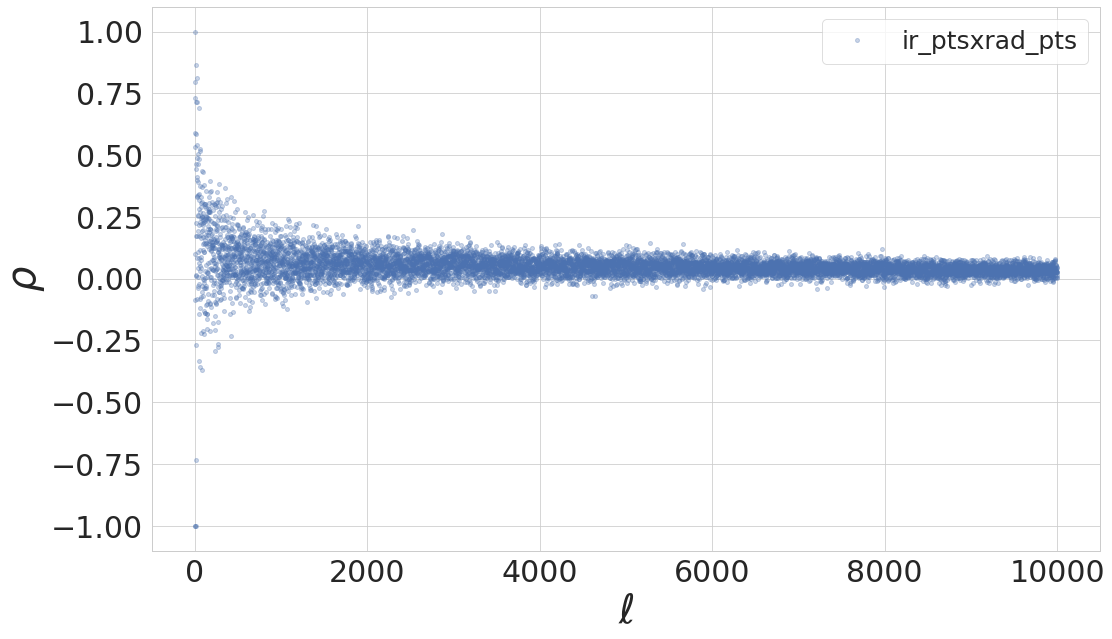

In [64]:
spectra = np.load(data_path("180820_spectra_full_lmax10000_20mjy.npz"))
def get_spectra(key1, key2, spectra=spectra):
    key = [key1, key2]
    key.sort()
    key = "x".join(key)
    if key in spectra:
        l = spectra["l"].copy()
        dls = spectra[key].copy()
    else:
        print("taking {}".format(key))
        sehgal_dir = "/home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/inputs/microwaveSky_20mjy/"
        SEHGAL10 = sehgal.SehgalSky2010(path=sehgal_dir, data_type='alm', unit="thermo")
        rfs = {"kappa": lambda : SEHGAL10.get_kappa(),
               "ksz": lambda : SEHGAL10.get_ksz(148),
               "tsz": lambda :SEHGAL10.get_tsz(148),
               "rad_pts": lambda :SEHGAL10.get_radio(148),
               "ir_pts": lambda :SEHGAL10.get_cib(148)
              }
        alm1 = np.complex128(rfs[key1]())
        alm2 = np.complex128(rfs[key2]())
        cl = hp.alm2cl(alm1, alm2)
        l = np.arange(len(cl))
        l_fact = l*(l+1)/(2*np.pi)
        dls = l_fact*cl
        spectra["l"] = np.arange(len(cl))
        spectra[key] = dls
    return (l, dls)

fig = plt.figure(figsize=(17,10))
ax = fig.gca()
compts = ["kappa", "ksz", "tsz", "rad_pts", "ir_pts"]
for key1 in compts:
    key2 = key1
    key = [key1, key2]
    key.sort()
    key = "x".join(key)
    l, dls= get_spectra(key1, key2)
    plt.plot(l, dls, alpha=0.3, label=key, ls="", marker="o", markersize=4)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.tick_params(axis='both', which='minor', labelsize=30)
plt.ylabel(r"$D_\ell$", fontsize=40)
plt.xlabel(r"$\ell$", fontsize=40)
plt.legend(fontsize=25)
plt.ylim(1e-7,2e3)
plt.yscale("log")
plt.show()


compts = ["kappa", "ksz", "tsz", "rad_pts", "ir_pts"]
for i in range(5-1):
    fig = plt.figure(figsize=(17,10))
    ax = fig.gca()
    for j in range(i+1,5):
        key1 = compts[i]
        key2 = compts[j]
        key = [key1, key2]
        key.sort()
        key = "x".join(key)
        l, dls_x= get_spectra(key1, key2)
        _, dls_1= get_spectra(key1, key1)
        _, dls_2= get_spectra(key2, key2)
        rho = dls_x/np.sqrt(dls_1*dls_2)
        plt.plot(l, rho, alpha=0.3, label=key, ls="", marker="o", markersize=4)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.tick_params(axis='both', which='minor', labelsize=30)
    plt.ylabel(r"$\rho$", fontsize=40)
    plt.xlabel(r"$\ell$", fontsize=40)
    plt.legend(fontsize=25)
    plt.show()
#np.savez(data_path("spectra_full_lmax10000_20mjy.npz"), **spectra)
